Training accuaracy using Pearsons correlation coefficient: 0.9999777651090661
The last MSE loss for training: 0.25153058718496135
The average MSE loss for training: 3.72814619414166

Testing accuaracy using Pearsons correlation coefficient: 0.9997168195935169
The last MSE loss for testing: 3.864705853850738
The average MSE loss for testing: 15.032953132693097


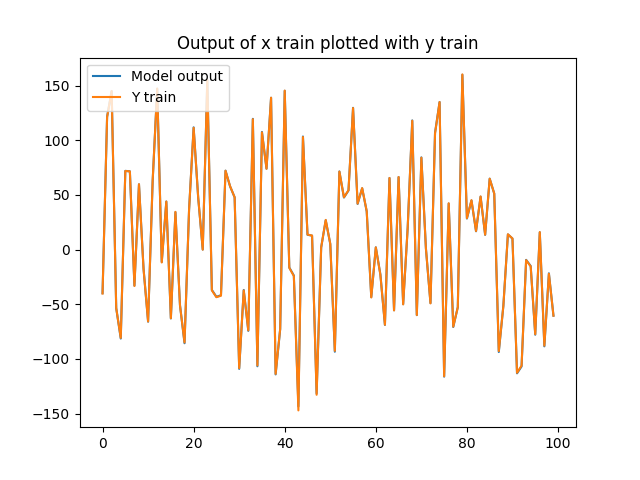

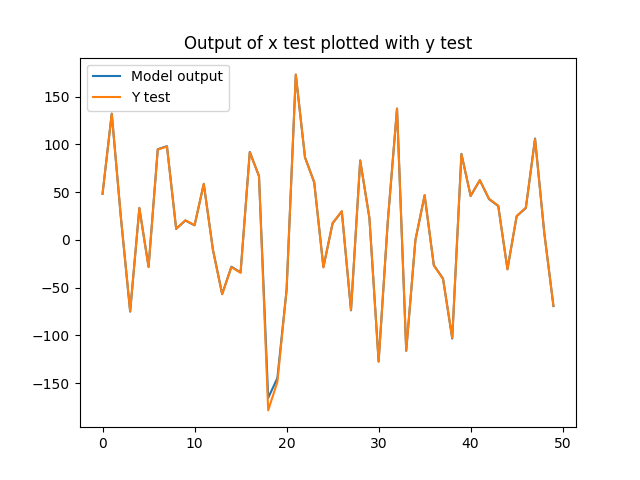

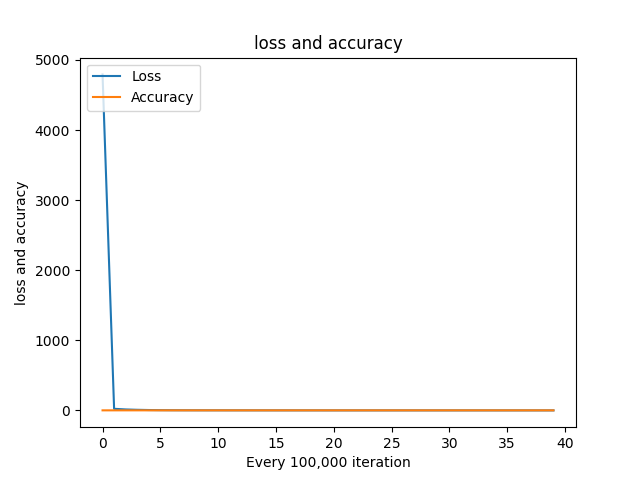

(1, 40)
(1, 40)
(1, 40)
(1, 40)
(4, 40)


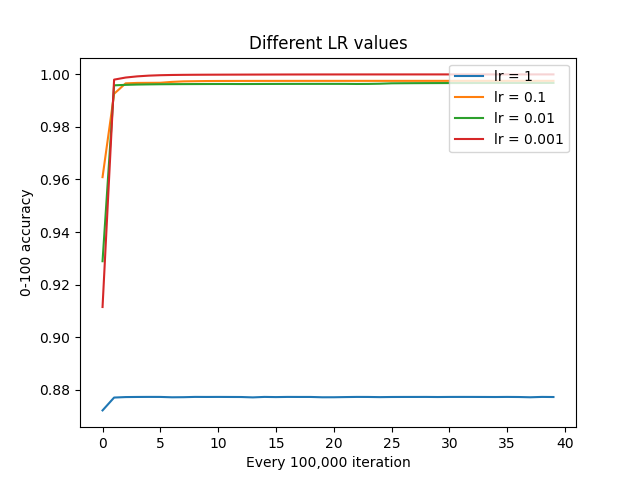

In [6]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))


# Define input
x = np.loadtxt("data/X_train.csv")
y = np.loadtxt("data/Y_train.csv")
y = y.reshape(100, 1)

# Define initial parameters
W1 = np.random.rand(2,25)
b1 = np.random.rand(1,25)
W2 = np.random.rand(25,1)
b2 = np.random.rand(1,1)

# Fwd Pass
z1 = np.dot(x, W1) + b1
a1 = sigmoid(z1)

z2 = np.dot(a1, W2) + b2
a2 = (z2)

# Compute gradients
dz2 = (a2 - y)
dW2 = np.dot(dz2.T, a1)
db2 = np.mean(dz2)
dz1 = np.dot(dz2, W2.T) * (sigmoid(z1) * (1-sigmoid(z1)))
dW1 = np.dot(x.T, dz1)
db1 = np.mean(dz1)

LR = 0.001

# Update weights
W1 = W1 - LR * dW1
W2 = W2 - LR * dW2.T
b1 = b1 - LR * db1
b2 = b2 - LR * db2.T


# Fwd Pass with new weights
z1New = np.dot(x, W1) + b1
a1New = sigmoid(z1New)
z2New = np.dot(a1New, W2) + b2
a2New = z2New

epochs = 4000000
#epochs = 400

loss_tracker = []
acc_tracker = []
total_loss_training = []
total_loss_testing = []

# Backprop
def backprop(W1, W2, b1, b2, z1New2, a2New2, a1New2, lr_testing):
	z1New = z1New2
	a2New = a2New2
	a1New = a1New2
	x_test = np.loadtxt("data/X_test.csv")
	y_test = np.loadtxt("data/Y_test.csv")
	y_test = y_test.reshape(50,1)
	acc_tracker = []
	for i in (range(epochs)):
		dz2 = (a2New - y)
		dW2 = (2/(200)) * np.dot(dz2.T, a1New) 
		db2 = np.mean(dz2)
		dz1 = np.dot(dz2, W2.T) * (sigmoid(z1New) * (1-sigmoid(z1New)))
		dW1 = (2/(200)) * np.dot(x.T, dz1) 
		db1 = np.mean(dz1)
		W1 = W1 - LR * dW1
		W2 = W2 - LR * dW2.T
		b1 = b1 - LR * db1
		b2 = b2 - LR * db2.T
		z1New = np.dot(x, W1) + b1
		a1New = sigmoid(z1New)
		z2New = np.dot(a1New, W2) + b2
		a2New = z2New

		#loss
		MSE1 = np.square(np.subtract(y, a2New)).mean()
		total_loss_training.append(MSE1)
		
		corr_y = y.reshape(100)
		corr_a2New = a2New.reshape(100)
		my_rho = np.corrcoef(corr_y, corr_a2New)

		acc = my_rho[0][1]

		# testing data
		z1NewT = np.dot(x_test, W1) + b1
		a1NewT = sigmoid(z1NewT)
		z2NewT = np.dot(a1NewT, W2) + b2
		a2NewT = z2NewT
		MSE_testing = np.square(np.subtract(y_test, a2NewT)).mean()
		total_loss_testing.append(MSE_testing)

		if i % 100000==0:
		#if i % 10==0:
			loss_tracker.append(MSE1)
			acc_tracker.append(acc)
	
	if lr_testing:
		return acc_tracker
			
	
	# question 1
	#training
	my_rho = np.corrcoef(corr_y, corr_a2New)
	loss_len = len(total_loss_training)
	loss_sum = np.sum(total_loss_training)
	average_loss = loss_sum/loss_len
	print("Training accuaracy using Pearsons correlation coefficient:", my_rho[0][1])
	print("The last MSE loss for training:", MSE1)	
	print("The average MSE loss for training:", average_loss)	
	print()

	# testing
	MSE_testing = np.square(np.subtract(y_test, a2NewT)).mean()
	corr_y = y_test.reshape(-1)
	corr_a2New = a2NewT.reshape(-1)
	my_rho = np.corrcoef(corr_y, corr_a2New)
	my_rho = np.corrcoef(corr_y, corr_a2New)
	loss_len = len(total_loss_testing)
	loss_sum = np.sum(total_loss_testing)
	average_loss = loss_sum/loss_len
	print("Testing accuaracy using Pearsons correlation coefficient:", my_rho[0][1])
	print("The last MSE loss for testing:", MSE_testing)	
	print("The average MSE loss for testing:", average_loss)	

	# plot the guess and y
	plt.title("Output of x train plotted with y train")
	plt.plot(a2New, label="Model output")
	plt.plot(y, label="Y train")
	plt.legend(loc="upper left")
	plt.show()


	# plot the test data
	plt.title("Output of x test plotted with y test")
	plt.plot(a2NewT, label="Model output")
	plt.plot(y_test, label="Y test")
	plt.legend(loc="upper left")
	plt.show()

	plt.title("loss and accuracy")
	plt.xlabel("Every 100,000 iteration")
	plt.ylabel("loss and accuracy")
	plt.plot(loss_tracker, label="Loss")
	plt.plot(acc_tracker, label="Accuracy")
	plt.legend(loc="upper left")
	plt.show()

backprop(W1, W2, b1, b2, z1New, a2New, a1New, False)

lr_list = [1, 0.1, 0.01, 0.001]
lr_Scores = np.empty((0, 40))
for lr in lr_list:
	LR = lr
	out = backprop(W1, W2, b1, b2, z1New, a2New, a1New, True)

	out = np.array(out)
	out = out.reshape(1, 40)
	print(out.shape)
	lr_Scores = np.append(lr_Scores, out, axis=0)

print(lr_Scores.shape)
plt.title("Different LR values")
plt.plot(lr_Scores[0], label="lr = 1")
plt.plot(lr_Scores[1], label="lr = 0.1")
plt.plot(lr_Scores[2], label="lr = 0.01")
plt.plot(lr_Scores[3], label="lr = 0.001")
plt.xlabel("Every 100,000 iteration")
plt.ylabel("0-100 accuracy")
plt.legend(loc="upper right")
plt.show()

1. What is the activation function that you will choose for the output layer? Justify your answer briefly.

I picked no activation function for the output layer. The reason for this is since this is a regression model something like a sigmoid would limit the values of the output. 

2. How many neurons should there be in the output layer? Why?

The output layer should have 1 neuron. (hidden, 1)
The output layer should be size (hidden, classes). This is because we only need 1 feature for y. Y is shape (100, 1). If Y was (100,2) then the output layer would be (hidden, 2).


3. Report the average MSE loss and the accuracy.

Training accuaracy using Pearsons correlation coefficient: 0.9999777651090656
The last MSE loss for training: 0.2515305871849618
The average MSE loss for training: 3.7281461941416483

Testing accuaracy using Pearsons correlation coefficient: 0.9997168195935173
The last MSE loss for testing: 3.864705853850922
The average MSE loss for testing: 15.03295313269303

4. Plot the loss and accuracy as a function of the number of iterations. 

"Loss and accuracy" graph above. You can see loss going down as accuracy rises. 


5. What is the effect of the learning rate on the training process? Vary the learning rate to be between 0.001 and 1.0 and plot the resulting accuracy as a function of learning rate

Learning rate allows for smaller adjustments over time. Plot is above, name is "Different LR values" You can see with a lr of 1 the accuracy stops a 88%, And you can see how the lower LR's take longer to train. 

6. What is the effect of the number of neurons in the hidden layer? To answer this question, you will need to consider and answer the following:  
a. You will need to vary the number of neurons from 1 to 10. Does the update rule
need to be changed/derived again? Why or why not?
b. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.

More neurons the better and faster the fit. 
A. No, becuase the number of neurons does not effect the update rule. There is not varibale in the update rule that needs the number of neurons therefore it doesn't change it.

B. Graphs are down below. The weights show that the training loss is getting better with more neurons, but also the testing loss is getting worse. The only reasoning i can think of for this is that it's overfitting, but that doesn't make sense because I got my best results with 25 neurons. You can also see how close the different amount of neurons made it to the label.

Final loss for Training with different weights:
number of weights: 1 loss: 267.1771903207457
number of weights: 2 loss: 120.63412565501687
number of weights: 3 loss: 63.98946979067308
number of weights: 4 loss: 45.17138012118678
number of weights: 5 loss: 31.565987244321917
number of weights: 6 loss: 23.491280601949793
number of weights: 7 loss: 17.73461188080046
number of weights: 8 loss: 14.76114853047042
number of weights: 9 loss: 11.255156377085548
number of weights: 10 loss: 9.138530904309619

Final loss for testing with different weights:
number of weights: 1 loss: 9934.536182573214
number of weights: 2 loss: 10930.067828744788
number of weights: 3 loss: 10310.252625520843
number of weights: 4 loss: 11016.012796590398
number of weights: 5 loss: 11042.315178518089
number of weights: 6 loss: 10479.57259077454
number of weights: 7 loss: 10523.645988698798
number of weights: 8 loss: 10546.79536393499
number of weights: 9 loss: 11079.11650907248
number of weights: 10 loss: 11071.75207

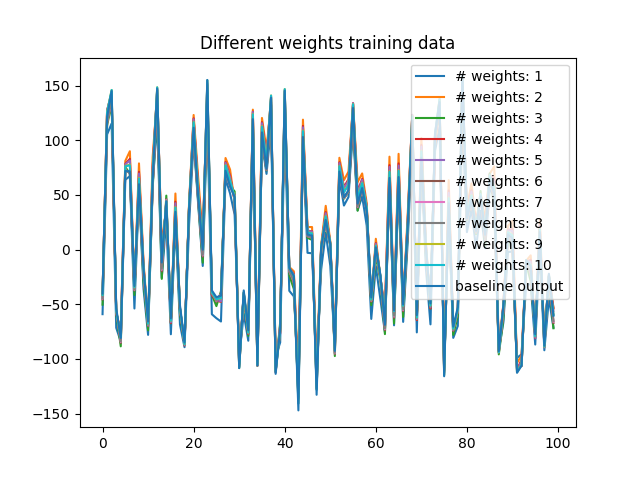

Predicted testing outputs polted with Y:


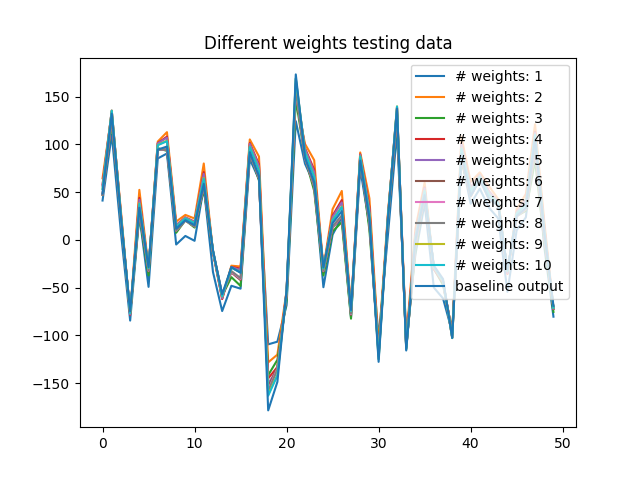

In [9]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
# Define activation function
def sigmoid(z):
	return 1/(1 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z)*(1-sigmoid(z))


# Define input
x = np.loadtxt("data/X_train.csv")
y = np.loadtxt("data/Y_train.csv")
y = y.reshape(100, 1)

final_loss_training = np.empty((0))
final_loss_testing = np.empty((0))

predicted_labels_testing = np.empty((0, 50))
predicted_labels_training = np.empty((0, 100))

for weight_value in range(1, 11):
	# Define initial parameters
	W1 = np.random.rand(2,weight_value)
	b1 = np.random.rand(1,weight_value)
	W2 = np.random.rand(weight_value,1)
	b2 = np.random.rand(1,1)

	# Fwd Pass
	z1 = np.dot(x, W1) + b1
	a1 = sigmoid(z1)

	z2 = np.dot(a1, W2) + b2
	a2 = (z2)

	# Compute gradients
	dz2 = (a2 - y)
	dW2 = np.dot(dz2.T, a1)
	db2 = np.mean(dz2)
	dz1 = np.dot(dz2, W2.T) * (sigmoid(z1) * (1-sigmoid(z1)))
	dW1 = np.dot(x.T, dz1)
	db1 = np.mean(dz1)

	LR = 0.001

	# Update weights
	W1 = W1 - LR * dW1
	W2 = W2 - LR * dW2.T
	b1 = b1 - LR * db1
	b2 = b2 - LR * db2.T


	# Fwd Pass with new weights
	z1New = np.dot(x, W1) + b1
	a1New = sigmoid(z1New)
	z2New = np.dot(a1New, W2) + b2
	a2New = z2New

	epochs = 4000000
	#epochs = 400

	loss_tracker = []
	acc_tracker = []
	total_loss_training = []
	total_loss_testing = []

	# Backprop
	def backprop(W1, W2, b1, b2, z1New2, a2New2, a1New2, lr_testing):
		z1New = z1New2
		a2New = a2New2
		a1New = a1New2
		global final_loss_training
		global predicted_labels_training
		global predicted_labels_testing
		global final_loss_testing

		x_test = np.loadtxt("data/X_test.csv")
		y_test = np.loadtxt("data/Y_test.csv")
		y_test = y_test.reshape(50,1)
		acc_tracker = []
		for i in (range(epochs)):
			dz2 = (a2New - y)
			dW2 = (2/(200)) * np.dot(dz2.T, a1New) 
			db2 = np.mean(dz2)
			dz1 = np.dot(dz2, W2.T) * (sigmoid(z1New) * (1-sigmoid(z1New)))
			dW1 = (2/(200)) * np.dot(x.T, dz1) 
			db1 = np.mean(dz1)
			W1 = W1 - LR * dW1
			W2 = W2 - LR * dW2.T
			b1 = b1 - LR * db1
			b2 = b2 - LR * db2.T
			z1New = np.dot(x, W1) + b1
			a1New = sigmoid(z1New)
			z2New = np.dot(a1New, W2) + b2
			a2New = z2New

			#loss
			MSE1 = np.square(np.subtract(y, a2New)).mean()
			total_loss_training.append(MSE1)
			
			corr_y = y.reshape(100)
			corr_a2New = a2New.reshape(100)
			my_rho = np.corrcoef(corr_y, corr_a2New)
			
		final_loss_training = np.append(final_loss_training, MSE1)

		a2New = a2New.reshape(1, 100)
		predicted_labels_training = np.append(predicted_labels_training, a2New, axis=0)

		# testing data
		z1NewT = np.dot(x_test, W1) + b1
		a1NewT = sigmoid(z1NewT)
		z2NewT = np.dot(a1NewT, W2) + b2
		a2NewT = z2NewT
		a2NewT = a2NewT.reshape(1, 50)
		predicted_labels_testing = np.append(predicted_labels_testing, a2NewT, axis=0)
		MSE_testing = np.square(np.subtract(y_test, a2NewT)).mean()
		final_loss_testing = np.append(final_loss_testing, MSE_testing)


	backprop(W1, W2, b1, b2, z1New, a2New, a1New, False)


print("Final loss for Training with different weights:")
for i in range(10):
	print("number of weights:", i+1, "loss:", final_loss_training[i])

print()
print("Final loss for testing with different weights:")
for i in range(10):
	print("number of weights:", i+1, "loss:", final_loss_testing[i])


print("Predicted training outputs polted with Y:")
for i in range(10):
	plt.plot(predicted_labels_training[i], label = "# weights: " + str(i+1))
plt.title("Different weights training data")
plt.plot(y, label = "baseline output")
plt.legend(loc="upper right")
plt.show()

y_test = np.loadtxt("data/Y_test.csv")
print("Predicted testing outputs polted with Y:")
for i in range(10):
	plt.plot(predicted_labels_testing[i], label = "# weights: " + str(i+1))
plt.title("Different weights testing data")
plt.plot(y_test, label = "baseline output")
plt.legend(loc="upper right")
plt.show()

7. What is the effect of the activation functions in the network? Explore two different activation functions other than sigmoid such as tanh, linear, or ReLU.
a. Will you need to change the update rule?
b. What is the change that you need to make to achieve this experiment?
c. Report your observations by reporting the final loss and plotting the true labels and
your predicted labels, along with a brief (2-3 lines) description.

The effect allows non-linear relationships if the function is non-linear. 
A. You will need to update the rule with what ever function you are using and then it's derivative in the backprop.
B. You need to change the previous function to the new one, and then change the derivative of the old function to the derivative of the function.
C. Graphs are down below. For some reason my RELU didn't converage. It was converaging before but i also had the epoches lower. I think RELU helps it converage faster, but they over trained in this case. The tanh didn't seem to completely converage either. m


Relu Final training loss: nan


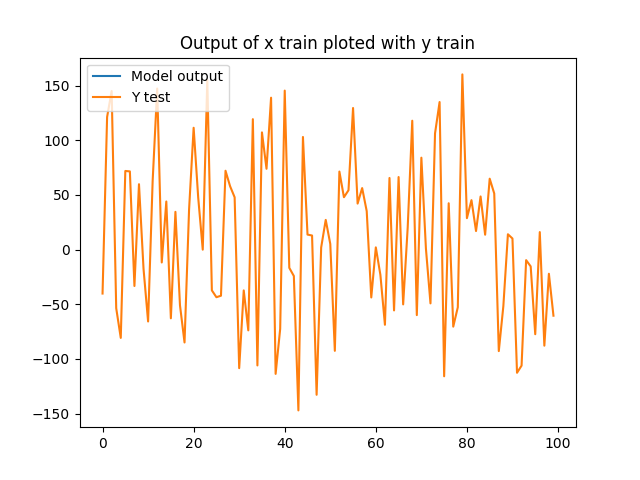

Relu Final testing loss: nan


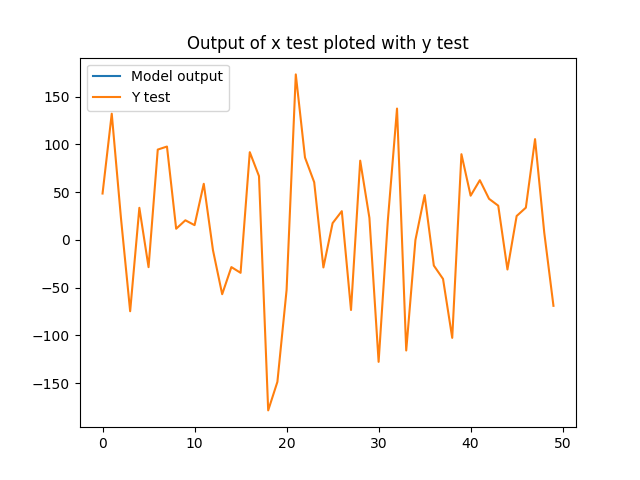

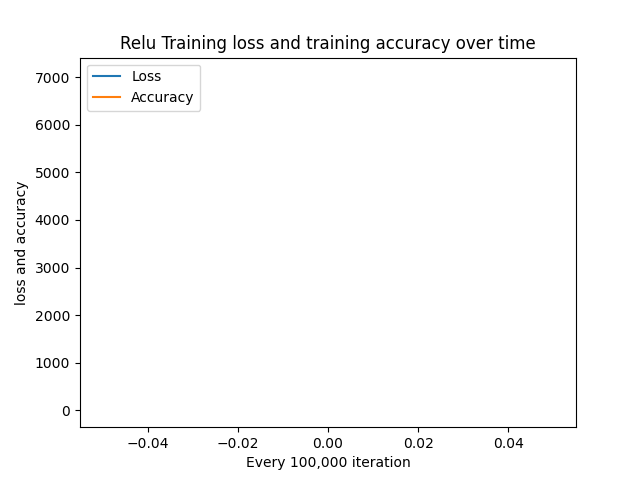

In [7]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
# Define activation function
def relu(z):
	#return 1/(1 + np.exp(-z))
	return(np.maximum(0, z))

def Relu_derivative(x):
	new_array = np.empty_like(x)

	for j in range(new_array.shape[0]):
		for i in range(new_array.shape[1]): 
			if x[j][i] > 0:
				y = 1
			elif x[j][i] <= 0:
				y = 0
			new_array[j][i] = y

	return new_array


# Define input
x = np.loadtxt("data/X_train.csv")
y = np.loadtxt("data/Y_train.csv")
y = y.reshape(100, 1)

# Define initial parameters
W1 = np.random.rand(2,25)
b1 = np.random.rand(1,25)
W2 = np.random.rand(25,1)
b2 = np.random.rand(1,1)

# Fwd Pass
z1 = np.dot(x, W1) + b1
a1 = relu(z1)

z2 = np.dot(a1, W2) + b2
a2 = (z2)

# Compute gradients
dz2 = (a2 - y)
dW2 = np.dot(dz2.T, a1)
db2 = np.mean(dz2)
dz1 = np.dot(dz2, W2.T) * (Relu_derivative(z1))
dW1 = np.dot(x.T, dz1)
db1 = np.mean(dz1)

LR = 0.001

# Update weights
W1 = W1 - LR * dW1
W2 = W2 - LR * dW2.T
b1 = b1 - LR * db1
b2 = b2 - LR * db2.T


# Fwd Pass with new weights
z1New = np.dot(x, W1) + b1
a1New = relu(z1New)
z2New = np.dot(a1New, W2) + b2
a2New = z2New

epochs = 4000000
#epochs = 40

loss_tracker = []
acc_tracker = []
total_loss_training = []
total_loss_testing = []

# Backprop
def backprop(W1, W2, b1, b2, z1New2, a2New2, a1New2, lr_testing):
	z1New = z1New2
	a2New = a2New2
	a1New = a1New2
	x_test = np.loadtxt("data/X_test.csv")
	y_test = np.loadtxt("data/Y_test.csv")
	y_test = y_test.reshape(50,1)
	acc_tracker = []
	for i in (range(epochs)):
		dz2 = (a2New - y)
		dW2 = (2/(200)) * np.dot(dz2.T, a1New) 
		db2 = np.mean(dz2)
		dz1 = np.dot(dz2, W2.T) * (Relu_derivative(z1))
		dW1 = (2/(200)) * np.dot(x.T, dz1) 
		db1 = np.mean(dz1)
		W1 = W1 - LR * dW1
		W2 = W2 - LR * dW2.T
		b1 = b1 - LR * db1
		b2 = b2 - LR * db2.T
		z1New = np.dot(x, W1) + b1
		a1New = relu(z1New)
		z2New = np.dot(a1New, W2) + b2
		a2New = z2New

		#loss
		MSE1 = np.square(np.subtract(y, a2New)).mean()
		total_loss_training.append(MSE1)
		
		corr_y = y.reshape(100)
		corr_a2New = a2New.reshape(100)
		my_rho = np.corrcoef(corr_y, corr_a2New)

		acc = my_rho[0][1]

		# testing data
		z1NewT = np.dot(x_test, W1) + b1
		a1NewT = relu(z1NewT)
		z2NewT = np.dot(a1NewT, W2) + b2
		a2NewT = z2NewT
		MSE_testing = np.square(np.subtract(y_test, a2NewT)).mean()
		total_loss_testing.append(MSE_testing)

		if i % 100000==0:
		#if i % 1==0:
			loss_tracker.append(MSE1)
			acc_tracker.append(acc)
	
	
	# plot the guess and y
	print("Relu Final training loss:", MSE1)
	plt.title("Output of x train ploted with y train")
	plt.plot(a2New, label="Model output")
	plt.plot(y, label="Y test")
	plt.legend(loc="upper left")
	plt.show()


	# plot the test data
	print("Relu Final testing loss:", MSE_testing)
	plt.title("Output of x test ploted with y test")
	plt.plot(a2NewT, label="Model output")
	plt.plot(y_test, label="Y test")
	plt.legend(loc="upper left")
	plt.show()

	plt.title("Relu Training loss and training accuracy over time")
	plt.plot(loss_tracker, label="Loss")
	plt.plot(acc_tracker, label="Accuracy")
	plt.legend(loc="upper left")
	plt.xlabel("Every 100,000 iteration")
	plt.ylabel("loss and accuracy")
	plt.show()

backprop(W1, W2, b1, b2, z1New, a2New, a1New, False)


Final training loss: 1354.5130601205265


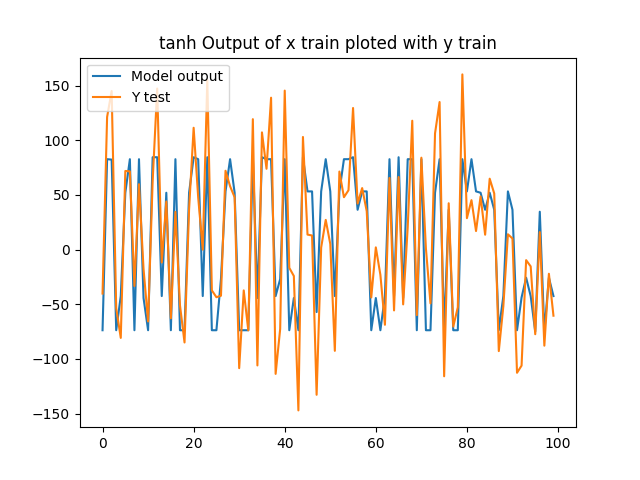

Final testing loss: 1390.1448997238297


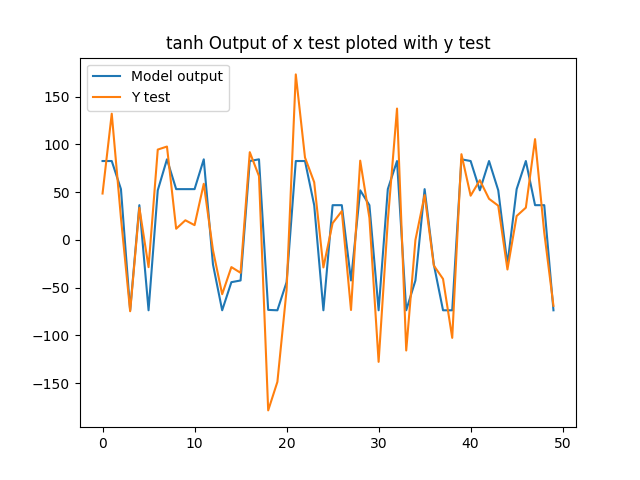

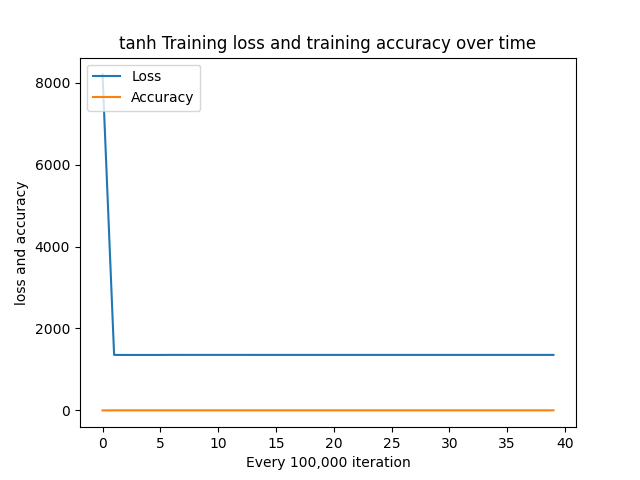

In [8]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)
# Define activation function
def tanh(z):
	#return 1/(1 + np.exp(-z))
	return(np.tanh(z))

def tanh_derivative(x):
	return (1- np.square(x))


# Define input
x = np.loadtxt("data/X_train.csv")
y = np.loadtxt("data/Y_train.csv")
y = y.reshape(100, 1)

# Define initial parameters
W1 = np.random.rand(2,25)
b1 = np.random.rand(1,25)
W2 = np.random.rand(25,1)
b2 = np.random.rand(1,1)

# Fwd Pass
z1 = np.dot(x, W1) + b1
a1 = tanh(z1)

z2 = np.dot(a1, W2) + b2
a2 = (z2)

# Compute gradients
dz2 = (a2 - y)
dW2 = np.dot(dz2.T, a1)
db2 = np.mean(dz2)
dz1 = np.dot(dz2, W2.T) * (tanh_derivative(z1))
dW1 = np.dot(x.T, dz1)
db1 = np.mean(dz1)

LR = 0.001

# Update weights
W1 = W1 - LR * dW1
W2 = W2 - LR * dW2.T
b1 = b1 - LR * db1
b2 = b2 - LR * db2.T


# Fwd Pass with new weights
z1New = np.dot(x, W1) + b1
a1New = tanh(z1New)
z2New = np.dot(a1New, W2) + b2
a2New = z2New

epochs = 4000000
#epochs = 40

loss_tracker = []
acc_tracker = []
total_loss_training = []
total_loss_testing = []

# Backprop
def backprop(W1, W2, b1, b2, z1New2, a2New2, a1New2, lr_testing):
	z1New = z1New2
	a2New = a2New2
	a1New = a1New2
	x_test = np.loadtxt("data/X_test.csv")
	y_test = np.loadtxt("data/Y_test.csv")
	y_test = y_test.reshape(50,1)
	acc_tracker = []
	for i in (range(epochs)):
		dz2 = (a2New - y)
		dW2 = (2/(200)) * np.dot(dz2.T, a1New) 
		db2 = np.mean(dz2)
		dz1 = np.dot(dz2, W2.T) * (tanh_derivative(z1))
		dW1 = (2/(200)) * np.dot(x.T, dz1) 
		db1 = np.mean(dz1)
		W1 = W1 - LR * dW1
		W2 = W2 - LR * dW2.T
		b1 = b1 - LR * db1
		b2 = b2 - LR * db2.T
		z1New = np.dot(x, W1) + b1
		a1New = tanh(z1New)
		z2New = np.dot(a1New, W2) + b2
		a2New = z2New

		#loss
		MSE1 = np.square(np.subtract(y, a2New)).mean()
		total_loss_training.append(MSE1)
		
		corr_y = y.reshape(100)
		corr_a2New = a2New.reshape(100)
		my_rho = np.corrcoef(corr_y, corr_a2New)

		acc = my_rho[0][1]

		# testing data
		z1NewT = np.dot(x_test, W1) + b1
		a1NewT = tanh(z1NewT)
		z2NewT = np.dot(a1NewT, W2) + b2
		a2NewT = z2NewT
		MSE_testing = np.square(np.subtract(y_test, a2NewT)).mean()
		total_loss_testing.append(MSE_testing)

		if i % 100000==0:
		#if i % 1==0:
			loss_tracker.append(MSE1)
			acc_tracker.append(acc)
	
	
	# plot the guess and y
	print("Final training loss:", MSE1)
	plt.title("tanh Output of x train ploted with y train")
	plt.plot(a2New, label="Model output")
	plt.plot(y, label="Y test")
	plt.legend(loc="upper left")
	plt.show()


	# plot the test data
	print("Final testing loss:", MSE_testing)
	plt.title("tanh Output of x test ploted with y test")
	plt.plot(a2NewT, label="Model output")
	plt.plot(y_test, label="Y test")
	plt.legend(loc="upper left")
	plt.show()

	plt.title("tanh Training loss and training accuracy over time")	
	plt.plot(loss_tracker, label="Loss")
	plt.plot(acc_tracker, label="Accuracy")
	plt.legend(loc="upper left")
	plt.xlabel("Every 100,000 iteration")
	plt.ylabel("loss and accuracy")
	plt.show()

backprop(W1, W2, b1, b2, z1New, a2New, a1New, False)
